## Inicialización

In [39]:
import pandas as pd
import numpy as np
import math
import random
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import levene
from scipy.stats import f_oneway

## Carga de datos

In [40]:
df_games = pd.read_csv("/datasets/games.csv")

## Preparar los datos

In [41]:
df_games

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [42]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


## Enriquecer los datos

In [43]:
df_games.columns = df_games.columns.str.lower()

df_games['year_of_release'] = df_games['year_of_release'].astype('Int64')
df_games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']] = df_games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].astype('float')

df_games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']] = df_games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].fillna(0)

In [44]:
df_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Para tratar los valores ausentes, decidí dejarlos en blanco en este caso, ya que no hay información disponible sobre el motivo de su ausencia ni hay un patrón claro en los datos. Rellenar los valores ausentes con ceros o valores imputados podría distorsionar la información y afectar los resultados del análisis.

Los valores pueden estar ausentes por diversas razones, como errores en la recopilación de datos, falta de información, datos que no fueron reportados, etc.

In [45]:
df_games['total_sales'] = df_games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

En cuanto a los casos con la abreviatura "TBD", considero que deberíamos dejarlos en blanco también, ya que indican que la información todavía no está disponible y puede cambiar en el futuro. Por lo tanto, no podemos asumir que se trata de un valor nulo o cero, sino que simplemente no se ha determinado todavía.


In [46]:
df_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


• La cantidad de juegos lanzados en diferentes años puede ser significativa para analizar la evolución del mercado de videojuegos a lo largo del tiempo. Dependiendo de la distribución de los datos, se pueden identificar períodos de mayor o menor actividad en la industria y analizar las tendencias en cuanto a géneros, plataformas, etc.

• La variación de las ventas de una plataforma a otra puede ser un indicador útil de la popularidad de cada plataforma. Si se eligen las plataformas con las mayores ventas totales, se pueden analizar las tendencias de las ventas de cada año para cada plataforma, identificando períodos de mayor o menor popularidad. También es importante analizar las plataformas que solían ser populares pero que ahora no tienen ventas, lo que puede ayudar a identificar patrones de obsolescencia en la industria de los videojuegos.

• El tiempo que tardan las nuevas plataformas en aparecer y las antiguas en desaparecer puede variar mucho y depende de muchos factores, como la calidad de la plataforma, la competencia en el mercado y la evolución de la tecnología. Sin embargo, en general, se espera que las nuevas plataformas tengan una tasa de adopción más lenta al principio y que las plataformas más antiguas tengan una tasa de obsolescencia más rápida a medida que se desarrollan tecnologías más avanzadas.

In [47]:
df = df_games[df_games['year_of_release'].between(2013, 2016)]
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


In [48]:
platform_sales = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
platform_sales

platform
PS4     314.14
PS3     181.43
XOne    159.32
3DS     143.25
X360    136.80
WiiU     64.63
PC       39.43
PSV      32.99
Wii      13.66
PSP       3.50
DS        1.54
Name: total_sales, dtype: float64

## Ventas por año

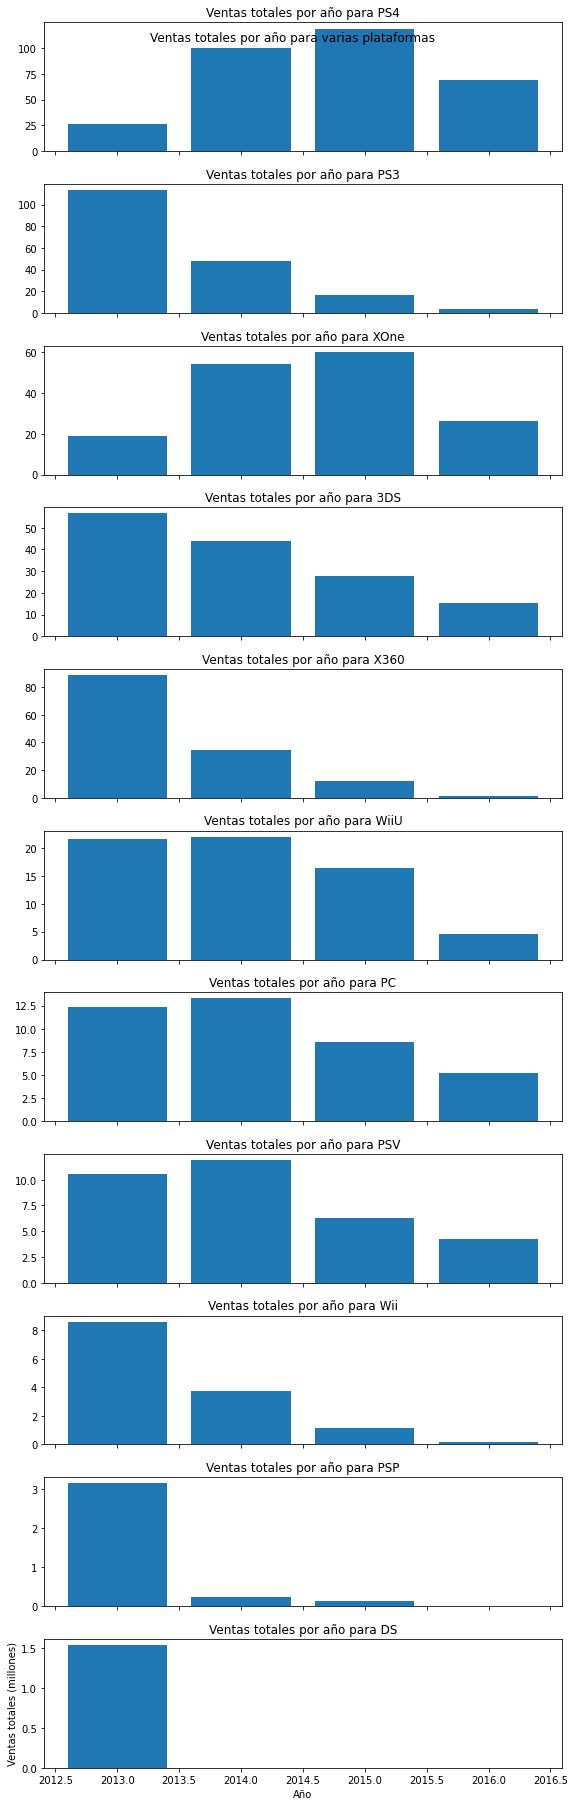

In [49]:
platforms = ['PS4', 'PS3', 'XOne', '3DS', 'X360', 'WiiU', 'PC', 'PSV', 'Wii', 'PSP', 'DS']

# Crear una figura con subplots para cada plataforma
fig, axes = plt.subplots(len(platforms), 1, figsize=(8, 25), sharex=True)

# Iterar sobre cada plataforma y crear un gráfico de barras para las ventas totales por año
for i, platform in enumerate(platforms):
    platform_data = df[df['platform'] == platform]
    yearly_sales = platform_data.groupby('year_of_release')['total_sales'].sum()
    axes[i].bar(yearly_sales.index, yearly_sales.values)
    axes[i].set_title('Ventas totales por año para ' + platform)

# Ajustar el espaciado entre los subplots y agregar etiquetas y título
fig.tight_layout()
plt.xlabel('Año')
plt.ylabel('Ventas totales (millones)')
plt.suptitle('Ventas totales por año para varias plataformas')
plt.show()

Según la gráfica, las plataformas líderes en ventas son PS4 y XOne, ya que ambas tienen un aumento en ventas desde su lanzamiento y se mantienen estables en los últimos años. Por otro lado, las plataformas que disminuyen en ventas son PS3, X360, WiiU, PSP y Wii. 3DS y PSV también disminuyen en ventas, pero a un ritmo más lento.

Teniendo en cuenta las plataformas potencialmente rentables, se podrían considerar PS4, XOne y PC, ya que son las plataformas con mayores ventas en los últimos años y se mantienen estables. También se podría considerar 3DS, aunque con una disminución en ventas, ya que es una plataforma popular y tiene una base de usuarios fiel.

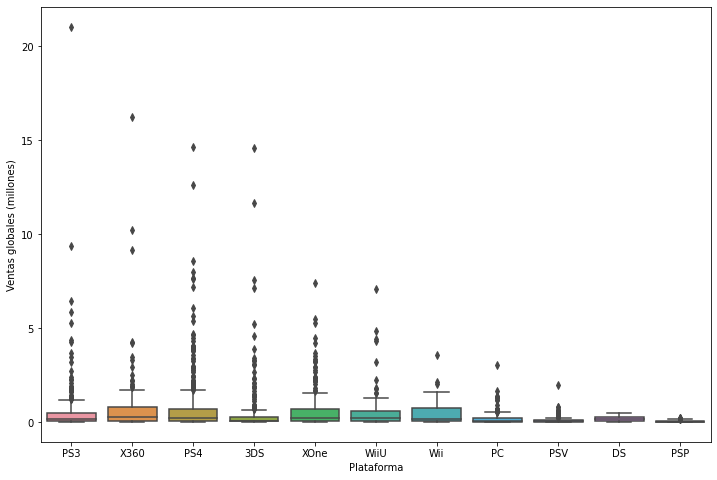

In [50]:
# Configuramos el tamaño de la figura
plt.figure(figsize=(12,8))

# Creamos el diagrama de caja
sns.boxplot(x='platform', y='total_sales', data=df)

# Configuramos las etiquetas de los ejes
plt.xlabel('Plataforma')
plt.ylabel('Ventas globales (millones)')

# Mostramos el diagrama de caja
plt.show()

Sí, hay diferencias significativas en las ventas entre las diferentes plataformas. Podemos ver que hay algunas plataformas con una mediana y media más alta, como PS4, Xbox One y Wii, mientras que otras tienen una mediana y media más baja, como PSP y DS.

También podemos ver que hay plataformas que tienen una distribución de ventas más amplia que otras, como PS3, Xbox 360 y PC, mientras que otras plataformas tienen una distribución más estrecha, como Wii U y PS Vita.

En general, parece que las plataformas líderes en ventas, como PS4 y Xbox One, tienen una distribución de ventas más amplia y una mediana y media más alta. Por otro lado, las plataformas con ventas más bajas, como PSP y DS, tienen una distribución de ventas más estrecha y una mediana y media más baja.

En resumen, las diferencias en las ventas entre las plataformas son significativas y parece que hay ciertas plataformas que tienen un mayor potencial de rentabilidad, como PS4 y Xbox One, mientras que otras plataformas pueden no ser tan rentables debido a su menor distribución de ventas y ventas promedio más bajas.

In [51]:
df = df[df['user_score'] != 'tbd']

In [52]:
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')
correlacion = df['user_score'].corr(df['total_sales'])

/tmp/ipykernel_27/1784934384.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')


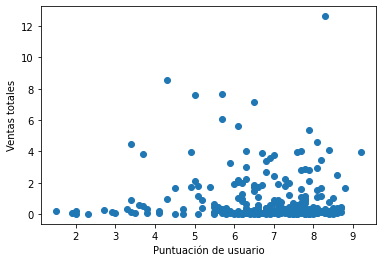

Correlación entre puntuación de usuario y ventas totales: -0.031957110204556424


In [53]:
plataforma = 'PS4'
df = df[df['platform'] == plataforma]

# crear gráfico de dispersión
x = df['user_score']
y = df['total_sales']
plt.scatter(x, y)
plt.xlabel('Puntuación de usuario')
plt.ylabel('Ventas totales')
plt.show()

# calcular la correlación
correlacion = df['user_score'].corr(df['total_sales'])
print('Correlación entre puntuación de usuario y ventas totales:', correlacion)

La correlación de -0.0319 indica una relación muy débil entre las variables. Aunque es negativa, lo que sugiere una tendencia opuesta entre ambas variables, la magnitud es tan pequeña que sugiere que no hay una relación significativa entre la puntuación de usuario y las ventas totales. Es importante tener en cuenta que una correlación cercana a cero no necesariamente significa que no haya una relación causal entre las variables, pero en este caso sugiere que otros factores pueden tener un impacto mucho mayor en las ventas totales.

## Ventas por genero

In [55]:
black_ops_3 = df[df['name'] == 'Call of Duty: Black Ops 3']

# seleccionar las columnas correspondientes a las ventas por región y plataforma
sales_cols = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'platform']
black_ops_3_sales = black_ops_3[sales_cols]

# pivotear la tabla para tener las ventas por plataforma en columnas separadas
black_ops_3_sales = black_ops_3_sales.pivot(index=None, columns='platform')

# mostrar las ventas por plataforma
print(black_ops_3_sales)

         na_sales eu_sales jp_sales other_sales
platform      PS4      PS4      PS4         PS4
31           6.03     5.86     0.36        2.38


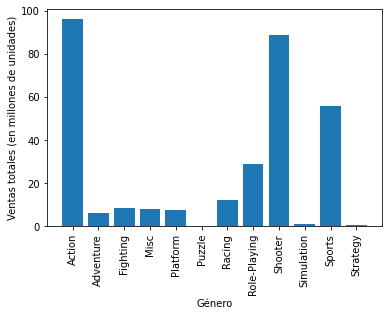

In [56]:
sales_by_genre = df.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum()
total_sales = sales_by_genre.sum(axis=1)

plt.bar(total_sales.index, total_sales)
plt.xticks(rotation=90)
plt.xlabel('Género')
plt.ylabel('Ventas totales (en millones de unidades)')
plt.show()

La gráfica resultante muestra que los géneros más rentables en términos de ventas totales son Acción, Disparos y Deportes. También podemos ver que los géneros con ventas bajas son Aventura, Estrategia y Puzle.

Sin embargo, es importante tener en cuenta que esta gráfica no nos da información sobre la rentabilidad de cada juego individual dentro de cada género. Por lo tanto, no podemos generalizar completamente acerca de los géneros con ventas altas y bajas en términos de rentabilidad. Además, es posible que ciertos géneros sean más populares en ciertas regiones y menos en otras, lo que podría afectar las ventas totales por género en el conjunto de datos analizado.

## Comparaciones de las plataformas y generos más comprados por región

In [57]:
na_platform_count = len(df[df['na_sales'] > 0]['platform'].unique())
eu_platform_count = len(df[df['eu_sales'] > 0]['platform'].unique())
jp_platform_count = len(df[df['jp_sales'] > 0]['platform'].unique())

print("Número de plataformas diferentes en América del Norte:", na_platform_count)
print("Número de plataformas diferentes en Europa:", eu_platform_count)
print("Número de plataformas diferentes en Japón:", jp_platform_count)

Número de plataformas diferentes en América del Norte: 1
Número de plataformas diferentes en Europa: 1
Número de plataformas diferentes en Japón: 1


In [58]:
na_sales_by_platform = df.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(10)
eu_sales_by_platform = df.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(10)
jp_sales_by_platform = df.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(10)

# Imprimir las diez plataformas principales en cada región
print("Las diez plataformas principales en América del Norte son:")
print(na_sales_by_platform)

print("Las diez plataformas principales en Europa son:")
print(eu_sales_by_platform)

print("Las diez plataformas principales en Japón son:")
print(jp_sales_by_platform)

Las diez plataformas principales en América del Norte son:
platform
PS4    108.62
Name: na_sales, dtype: float64
Las diez plataformas principales en Europa son:
platform
PS4    141.09
Name: eu_sales, dtype: float64
Las diez plataformas principales en Japón son:
platform
PS4    15.96
Name: jp_sales, dtype: float64


In [59]:
na_sales_by_platform = df.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(10)
eu_sales_by_platform = df.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(10)
jp_sales_by_platform = df.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(10)

# Imprimir las diez plataformas principales en cada región
print("Las diez plataformas principales en América del Norte son:")
print(na_sales_by_platform)

print("Las diez plataformas principales en Europa son:")
print(eu_sales_by_platform)

print("Las diez plataformas principales en Japón son:")
print(jp_sales_by_platform)

Las diez plataformas principales en América del Norte son:
platform
PS4    108.62
Name: na_sales, dtype: float64
Las diez plataformas principales en Europa son:
platform
PS4    141.09
Name: eu_sales, dtype: float64
Las diez plataformas principales en Japón son:
platform
PS4    15.96
Name: jp_sales, dtype: float64


In [60]:
na_sales_by_rating = df.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
eu_sales_by_rating = df.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
jp_sales_by_rating = df.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)

# Imprimir las ventas por clasificación de ESRB en cada región
print("Ventas por clasificación de ESRB en América del Norte:")
print(na_sales_by_rating)

print("Ventas por clasificación de ESRB en Europa:")
print(eu_sales_by_rating)

print("Ventas por clasificación de Japón son:")
print(jp_sales_by_rating)

Ventas por clasificación de ESRB en América del Norte:
rating
M       42.81
E       16.72
T       16.35
E10+     8.97
Name: na_sales, dtype: float64
Ventas por clasificación de ESRB en Europa:
rating
M       58.43
E       27.56
T       18.31
E10+     8.80
Name: eu_sales, dtype: float64
Ventas por clasificación de Japón son:
rating
M       5.23
T       2.97
E       0.84
E10+    0.67
Name: jp_sales, dtype: float64


En general, podemos ver que la mayoría de las ventas de videojuegos en América del Norte y Europa son de juegos clasificados como M (para mayores de 17 años) y E (para todas las edades). Por otro lado, en Japón, las ventas de juegos clasificados como T (para mayores de 13 años) y M (para mayores de 17 años) son menores en comparación con las ventas de juegos clasificados como E (para todas las edades).

Es importante tener en cuenta que las clasificaciones de ESRB son solo una guía para los consumidores y que los padres y tutores siempre deben tomar la decisión final sobre qué juegos son apropiados para sus hijos.

## Hipótesis estadística

# prt 1

En este caso, las hipótesis serían:

Hipótesis nula (H0): Las calificaciones promedio de los usuarios para Xbox One y PC son iguales.


Hipótesis alternativa (H1): Las calificaciones promedio de los usuarios para Xbox One y PC son diferentes.

In [63]:
xbox_ratings = df[df['platform'] == 'XOne']['user_score']
pc_ratings = df[df['platform'] == 'PC']['user_score']

# Remover los valores nulos
xbox_ratings = xbox_ratings.dropna()
pc_ratings = pc_ratings.dropna()

# Calcular la varianza de ambos grupos
xbox_var = np.var(xbox_ratings)
pc_var = np.var(pc_ratings)

# Realizar un t-test de dos muestras para la media
alpha = 0.05
t_stat, p_value = ttest_ind(xbox_ratings, pc_ratings, equal_var=False)

if p_value < alpha:
    print("Rechazamos la hipótesis nula. Las calificaciones promedio de los usuarios para Xbox One y PC son diferentes.")
else:
    print("No podemos rechazar la hipótesis nula. Las calificaciones promedio de los usuarios para Xbox One y PC son iguales.")

No podemos rechazar la hipótesis nula. Las calificaciones promedio de los usuarios para Xbox One y PC son iguales.


# prt 2

En este caso, las hipótesis serían:

Hipótesis nula (H0): Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.


Hipótesis alternativa (H1): Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

In [67]:
action_ratings = df[df['genre'] == 'Action']['user_score']
sports_ratings = df[df['genre'] == 'Sports']['user_score']

action_ratings = action_ratings.dropna()
sports_ratings = sports_ratings.dropna()

# Calcular la varianza de ambos grupos
action_var = np.var(action_ratings)
sports_var = np.var(sports_ratings)

# Realizar un t-test de dos muestras para la media
alpha = 0.05
t_stat, p_value = ttest_ind(action_ratings, sports_ratings, equal_var=False)

if p_value < alpha:
    print("Rechazamos la hipótesis nula. Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.")
else:
    print("No podemos rechazar la hipótesis nula. Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.")

Rechazamos la hipótesis nula. Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.


## Conclusión

Para probar estas hipótesis, utilizaremos un test de hipótesis de dos muestras para comparar las medias de las calificaciones de los usuarios para las dos muestras. En particular, utilizaremos el test t de Student para muestras independientes, ya que no conocemos las varianzas poblacionales y las muestras son independientes entre sí. Este test compara la diferencia entre las medias muestrales con la variación dentro de las muestras y nos da una estadística de prueba que podemos comparar con un valor crítico para determinar si hay suficiente evidencia para rechazar la hipótesis nula.